In [1]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # 防止使用plot挂掉

In [2]:
# 回归类数据集创建方法
num_inputs = 2 # 2个特征
num_examples = 1000 # 1000条数据

In [3]:
torch.manual_seed(428) # 随机数种子
# 预计回归方程为 y = 2 * x1 - x2 + 1
w_true = torch.tensor([2, -1], dtype=torch.float32).reshape(2, 1)
b_true = torch.tensor([1], dtype=torch.float32)

features = torch.randn(num_examples, num_inputs) 
labels_true = torch.mm(features, w_true) + b_true
labels = labels_true + torch.randn(size=labels_true.shape) * 0.01 # 更接近现实世界 创建误差

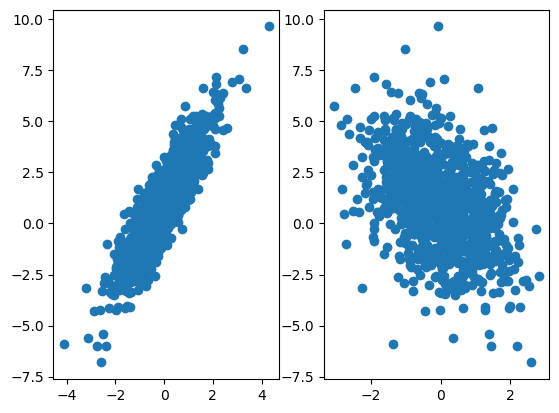

In [5]:
plt.subplot(121)
plt.scatter(features[:, 0], labels) # 观察第一个特征与标签的线性关系
plt.subplot(122) 
plt.scatter(features[:, 1], labels)  # 观察第二个特征与标签的线性关系

In [7]:
# 将上述过程封装成函数
# 回归数据集创建方法
def tensorGenReg(num_example=1000, w=[2, -1, -1], bias=True, delta=0.01, deg=1):
    if bias == True:
        num_input = len(w) - 1
        features_true = torch.randn(num_example, num_input)
        w_true = torch.tensor(w[:-1]).reshape(-1, 1).float()
        b_true = torch.tensor(w[-1]).float()
        if num_input == 1:
            labels_true = torch.pow(features_true, deg) * w_true + b_true
        else:
            labels_true = torch.mm(torch.pow(features_true, deg), w_true) + b_true
        features = torch.cat((features_true, torch.ones(len(features_true), 1)), 1)
        labels = labels_true + torch.randn(size=labels_true.shape) * delta
    else:
        num_input = len(w)
        features_truee = torch.randn(num_example, num_input)
        w_true = torch.tensor(w).reshape(-1, 1).float()
        if num_input == 1:
            labels_true = torch.pow(features_true, deg) * w_true
        else:
            labels_true = torch.mm(torch.pow(features_true, deg), w_true)
        labels = labels_true + torch.randn(size=labels_true.shape) * delta
    return features_true, labels

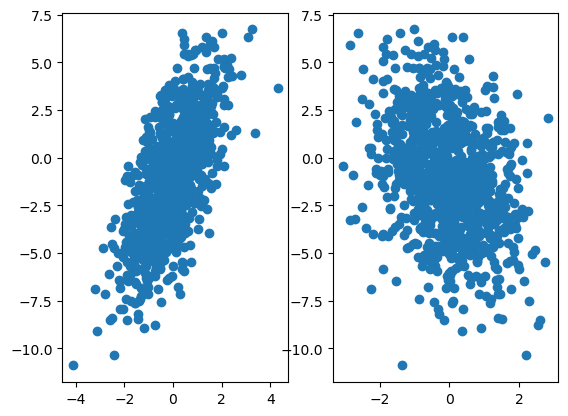

In [10]:
torch.manual_seed(428)
f, l = tensorGenReg(delta=2)
plt.subplot(121)
plt.scatter(f[:, 0], l) # 观察第一个特征与标签的线性关系
plt.subplot(122) 
plt.scatter(f[:, 1], l)  # 观察第二个特征与标签的线性关系

In [28]:
# 分类数据集创建方法
def tensorGenCla(num_examples=500, num_inputs=2, num_class=3, deg_dispersion=[4, 2], bias=False):
    cluster_l = torch.empty(num_examples, 1)
    mean_ = deg_dispersion[0]
    std_ = deg_dispersion[1]
    lf = []
    ll = []
    k = mean_ * (num_class - 1) / 2
    
    for i in range(num_class):
        data_tmp = torch.normal(i * mean_ - k, std_, size=(num_examples, num_inputs))
        lf.append(data_tmp)
        labels_tmp = torch.full_like(cluster_l, i)
        ll.append(labels_tmp)
        
    features = torch.cat(lf).float()
    labels = torch.cat(ll).long()
    
    if bias == True:
        features = torch.cat((features, torch.ones(len(features), 1)), 1)
    return features, labels

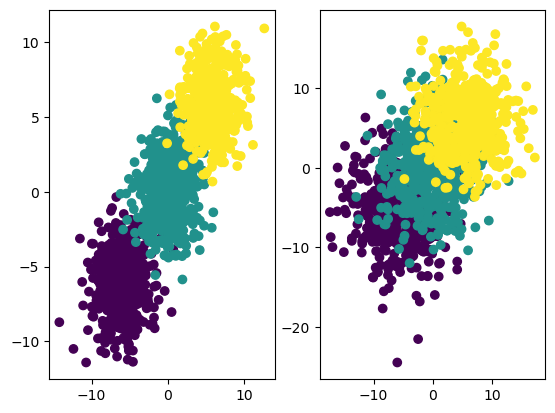

In [30]:
torch.manual_seed(428)
f1, l1 = tensorGenCla(deg_dispersion=[6, 2])
f2, l2 = tensorGenCla(deg_dispersion=[6, 4])

plt.subplot(121)
plt.scatter(f1[:, 0], f1[:, 1], c=l1)
plt.subplot(122)
plt.scatter(f2[:, 0], f2[:, 1], c=l2)

In [31]:
# 创建小批量切分函数
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 打乱数据集索引
    l = []
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        l.append([torch.index_select(features, 0, j), torch.index_select(labels, 0, j)])
    return l

In [32]:
torch.manual_seed(428)
f, l = tensorGenCla()

In [33]:
l1 = data_iter(10, f, l)

In [36]:
l1[0]

[tensor([[ 1.4298, -3.3642],
         [ 3.7811,  4.9548],
         [ 1.7046,  2.5784],
         [ 3.1893,  1.0968],
         [-2.2686, -4.9275],
         [ 0.0954, -0.5772],
         [-2.0349, -7.1793],
         [-1.9250, -3.1822],
         [ 2.1501,  4.6534],
         [ 3.0676,  4.6584]]),
 tensor([[1],
         [2],
         [2],
         [2],
         [0],
         [1],
         [0],
         [1],
         [2],
         [2]])]

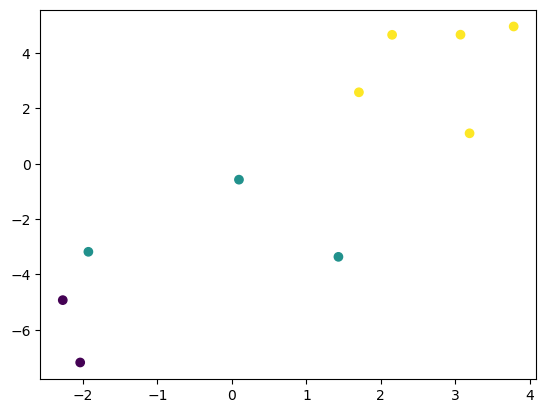

In [38]:
plt.scatter(l1[0][0][:, 0], l1[0][0][:, 1], c = l1[0][1])